In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/casting(product)_dataset',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='binary',
                                                  subset='training')

Found 4808 images belonging to 2 classes.


In [ ]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/casting(product)_dataset',
                                                target_size=(IMG_SIZE,IMG_SIZE),
                                                batch_size=BATCH_SIZE,
                                                class_mode='binary',
                                                subset='validation')

Found 1202 images belonging to 2 classes.


In [ ]:
model=keras.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(128,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(128,activation='relu'),
                        layers.Dense(1,activation='sigmoid')])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=8,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5746 - loss: 0.8342

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 745s 5s/step - accuracy: 0.5752 - loss: 0.8329 - val_accuracy: 0.8270 - val_loss: 0.4132
Epoch 2/8
151/151 ━━━━━━━━━━━━━━━━━━━━ 586s 4s/step - accuracy: 0.8290 - loss: 0.3873 - val_accuracy: 0.8968 - val_loss: 0.2273
Epoch 3/8
151/151 ━━━━━━━━━━━━━━━━━━━━ 586s 4s/step - accuracy: 0.9498 - loss: 0.1396 - val_accuracy: 0.9584 - val_loss: 0.1147
Epoch 4/8
151/151 ━━━━━━━━━━━━━━━━━━━━ 574s 4s/step - accuracy: 0.9616 - loss: 0.1043 - val_accuracy: 0.9825 - val_loss: 0.0637
Epoch 5/8
151/151 ━━━━━━━━━━━━━━━━━━━━ 763s 5s/step - accuracy: 0.9797 - loss: 0.0626 - val_accuracy: 0.9825 - val_loss: 0.0573
Epoch 6/8
151/151 ━━━━━━━━━━━━━━━━━━━━ 806s 5s/step - accuracy: 0.9909 - loss: 0.0307 - val_accuracy: 0.9925 - val_loss: 0.0315
Epoch 7/8
151/151 ━━━━━━━━━━━━━━━━━━━━ 775s 5s/step - accuracy: 0.9953 - loss: 0.0194 - val_accuracy: 0.9859 - val_loss: 0.0489
Epoch 8/8
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9905 - loss: 0.0234

In [ ]:
model.save('/content/drive/MyDrive/casting(product)_dataset/product(casting)_model.h5')

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/casting(product)_dataset/product(casting)_model.h5')
print('Model Loaded')

Model Loaded


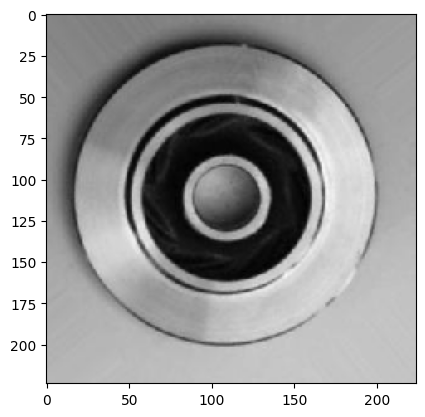

In [50]:
test_image_path='/content/drive/MyDrive/casting(product)_dataset/nondefect_front/cast_ok_0_1002.jpeg'
img=image.load_img(test_image_path,target_size=(IMG_SIZE,IMG_SIZE))
plt.imshow(img)
plt.axis()
plt.show()

In [51]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [52]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
[[0.9919318]]


In [53]:
if prediction >=0.5:
  print('NO DEFECT DETECTED')
else:
  print('DEFECT DETECTED')

NO DEFECT DETECTED
